# Data & Apprentissage


## Partie 1

Voici un **résumé clair en français**, reformulé comme un texte descriptif (pas un exercice), avec les notions importantes en **gras** et les symboles mathématiques correctement affichés pour un notebook Jupyter (**$\text{}$**), comme tu l’as demandé.

---

Dans cette partie du projet, on analyse le fonctionnement probabiliste d’un **système de sécurité** composé d’une **batterie** (variable **$b$**), de deux **capteurs** (**$c$** et **$d$**) et d’une **alarme** (**$a$**). Chacune de ces variables est **binaire** :
– **$a = 1$** lorsque l’alarme se déclenche,
– **$b = 1$** lorsque la batterie fonctionne correctement,
– **$c = 1$** et **$d = 1$** lorsque les capteurs fonctionnent correctement.

Le système est structuré de façon à ce que la **batterie** alimente les deux capteurs par des câbles indépendants, tandis que les capteurs transmettent ensuite l’information à l’alarme. Chaque capteur possède également une **source d’alimentation interne**, mais fonctionner sans la batterie extérieure le rend beaucoup plus susceptible de tomber en panne.
D’après le manuel, la **probabilité que la batterie tombe en panne** est de **0.1**, et chaque capteur tombe en panne avec probabilité **0.01** lorsque la batterie fonctionne, contre **0.7** lorsqu’elle est défaillante.
Enfin, l’alarme se déclenche avec **probabilité 0.02** si **au moins un capteur fonctionne**, et elle devient **30 fois plus probable** lorsque **les deux capteurs sont défaillants**.

L’étude consiste d’abord à représenter ces dépendances via un **modèle graphique probabiliste**. On calcule ensuite les **probabilités conjointes** telles que **$p(a,b,c,d)$** et **$p(a,c)$**, tout en vérifiant si les deux capteurs **$c$** et **$d$** sont **indépendants**.
On s’intéresse également à plusieurs inférences conditionnelles : par exemple, lorsque **l’alarme est silencieuse** et qu’on observe que **seul le capteur $d$ fonctionne**, on cherche le **posterior** de la probabilité que la batterie soit défaillante. On calcule également la probabilité totale que **l’alarme reste silencieuse**, **$p(a = 0)$**.

Une autre question explore le dimensionnement du système : en supposant que l’alarme se déclenche normalement avec probabilité **0.02** lorsqu’au moins un capteur fonctionne, et avec probabilité **0.6** lorsqu’aucun capteur n’est opérationnel, on cherche à déterminer **le nombre de capteurs nécessaires** pour que la probabilité totale **$p(a = 1)$** devienne **inférieure à 0.05**.

On étudie ensuite le cas où **l’alarme n’est pas entendue** et où l’on ne dispose d’**aucune information** sur l’état des capteurs, afin de déterminer la **probabilité que la batterie soit défaillante** dans ces conditions.

Enfin, une **fonction de génération aléatoire** est mise en place pour simuler des observations issues du modèle probabiliste. Ces simulations permettent de **valider empiriquement** les calculs théoriques réalisés à la main.


## Solution :

Les variables du systéme sont : 

* b: batterie (1 si elle fonctionne,0 si elle tombe en panne).
* c et d: capteurs (1 s'ils fonctionnent, 0 s'ils tombent en panne).
* a : alarme (1 si elle se déclenche, 0 sinon).

Fonctionnement : 

* La batterie b influence les capteurs c et d car elle fournit de l'énergie pour leurs fonctionnement.
* Les capteurs c et d influencent l'alarme a.






**a)** Representation du graphe du systéme :
le code suivant réalise le shéma demandé : 


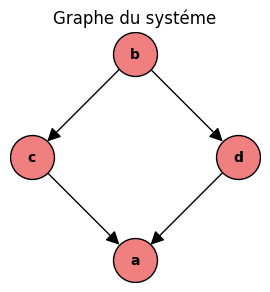

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx

def graphe():
    G = nx.DiGraph()

    neud = ['b', 'c', 'd', 'a']
    G.add_nodes_from(neud)

    edges = [('b', 'c'), 
             ('b', 'd'),
             ('c', 'a'),
             ('d', 'a')]
    G.add_edges_from(edges)

    pos = {
        'b': (0, 1),
        'c': (-1, 0),
        'd': (1, 0),
        'a': (0, -1)
    }

    plt.figure(figsize=(2.5, 2.5))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightcoral', edgecolors = 'black', font_size=10, font_weight='bold', arrowsize=20)
    plt.title("Graphe du systéme")
    plt.show()

graphe()


Données : 

$ P(b=0)=0.1 $   
$ P(b=1)=0.9 $     

La batterie fonctionne :

$ P(c=0|b=1)=0.01 $   
$ P(c=1|b=1)=0.99 $            
$ P(d=0|b=1)=0.01 $       
$ P(d=1|b=1)=0.99 $

La batterie ne fonctionne pas :

$ P(c=0|b=0)=0.7 $   
$ P(c=1|b=0)=0.3 $            
$ P(d=0|b=0)=0.7 $       
$ P(d=1|b=0)=0.3 $


Si au moin un capteur fonctionne, l'alarme se déclenche avec une probabilité de

$$ 
P(a=1 \mid c=1 \text{ ou } d=1) = 0.02 
$$ 

$$
P(a = 0 \mid c = 1 \text{ ou } d = 1) = 0.98
$$

Si aucun capteur ne fonctionne, l'alarme se déclenche avec une probabilité 30 fois plus élevée
$$P(a=1 \mid c=0 \text{ et } d=0) = 30 \times 0.02 = 0.6$$
$$P(a = 0 \mid c = 0 \text{ et } d = 0) = 0.4$$


**b)** Calculer les probabilité :

$$P(a, b, c, d) = P(b) \cdot P(c \mid b) \cdot P(d \mid b) \cdot P(a \mid c, d)$$

calculer 16 combinaison : 
| b | c | d | a | \(P(a, b, c, d)\)                                      |
|---|---|---|---|-------------------------------------------------------|
| 0 | 0 | 0 | 0 | $0.1 \times 0.7 \times 0.7 \times 0.4 = 0.0196$      |
| 0 | 0 | 0 | 1 | $0.1 \times 0.7 \times 0.7 \times 0.6 = 0.0294$      |
| 0 | 0 | 1 | 0 | $0.1 \times 0.7 \times 0.3 \times 0.98 = 0.02058$    |
| 0 | 0 | 1 | 1 | $0.1 \times 0.7 \times 0.3 \times 0.02 = 0.00042$    |
| 0 | 1 | 0 | 0 | $0.1 \times 0.3 \times 0.7 \times 0.98 = 0.02058$    |
| 0 | 1 | 0 | 1 | $0.1 \times 0.3 \times 0.7 \times 0.02 = 0.00042$    |
| 0 | 1 | 1 | 0 | $0.1 \times 0.3 \times 0.3 \times 0.98 = 0.00882$    |
| 0 | 1 | 1 | 1 | $0.1 \times 0.3 \times 0.3 \times 0.02 = 0.00018$    |
| 1 | 0 | 0 | 0 | $0.9 \times 0.01 \times 0.01 \times 0.4 = 0.000036$  |
| 1 | 0 | 0 | 1 | $0.9 \times 0.01 \times 0.01 \times 0.6 = 0.000054$  |
| 1 | 0 | 1 | 0 | $0.9 \times 0.01 \times 0.99 \times 0.98 = 0.0087318$|
| 1 | 0 | 1 | 1 | $0.9 \times 0.01 \times 0.99 \times 0.02 = 0.0001782$|
| 1 | 1 | 0 | 0 | $0.9 \times 0.99 \times 0.01 \times 0.98 = 0.0087318$|
| 1 | 1 | 0 | 1 | $0.9 \times 0.99 \times 0.01 \times 0.02 = 0.0001782$|
| 1 | 1 | 1 | 0 | $0.9 \times 0.99 \times 0.99 \times 0.98 = 0.8644482$|
| 1 | 1 | 1 | 1 | $0.9 \times 0.99 \times 0.99 \times 0.02 = 0.0176418$|


**Calcul de P(a,c):**
$$
P(a, c) = \sum_{b \in \{0, 1\}} \sum_{d \in \{0, 1\}} P(a, b, c, d)

$$

$$P(a = 0, c = 0) = 0.0196 + 0.02058 + 0.000036 + 0.0087318 = 0.0489478$$
$$P(a = 0, c = 1) = 0.02058 + 0.00882 + 0.0087318 + 0.8644482 = 0.90258$$
$$P(a = 1, c = 0) = 0.0294 + 0.00042 + 0.000054 + 0.0001782 = 0.0300522$$
$$P(a = 1, c = 1) = 0.00042 + 0.00018 + 0.0001782 + 0.0176418 = 0.01842$$

* $P(a = 0, c = 0) + P(a = 0, c = 1) + P(a = 1, c = 0) + P(a = 1, c = 1)$
  $= 0.0489478 + 0.90258 + 0.0300522 + 0.01842 = 1$

**Vérification de l'indépendance de c et d :**
$$P(c \cap d) = P(c) \times P(d)$$

* Calcul de $P(c)$:
$$
P(c = 1) = \sum_{b \in \{0, 1\}} P(c = 1 \mid b) \cdot P(b)
$$

$$
P(c = 1, b = 1) = P(c = 1 \mid b = 1) \cdot P(b = 1)

                = 0.99 \cdot 0.9 = 0.891
$$

$$
P(c = 1, b = 0) = P(c = 1 \mid b = 0) \cdot P(b = 0)

                = 0.3 \cdot 0.1 = 0.03
$$

$$
P(c = 1) = P(c = 1, b = 1) + P(c = 1, b = 0)
         = 0.891 + 0.03 = 0.921
$$

* Calcul de $P(d)$:
$$
P(d = 1) = \sum_{b \in \{0, 1\}} P(d = 1 \mid b) \cdot P(b)
$$

$$
P(d = 1) = P(d = 1 \mid b = 0) \cdot P(b = 0) + P(d = 1 \mid b = 1) \cdot P(b = 1)\\
= 0.99 \cdot 0.9 + 0.3 \cdot 0.1 = 0.921
$$

* Calcul de $P(c \cap d)$ : 
$$P(c = 1, d = 1 \mid b = 1) = P(c = 1 \mid b = 1) \cdot P(d = 1 \mid b = 1) = 0.99 \cdot 0.99 = 0.9801$$

$$P(c = 1, d = 1 \mid b = 0) = P(c = 1 \mid b = 0) \cdot P(d = 1 \mid b = 0) = 0.3 \cdot 0.3 = 0.09$$

$$P(c = 1, d = 1) = 0.9801 \cdot 0.9 + 0.09 \cdot 0.1 = 0.88209 + 0.009 = 0.89109$$

on verifie :

$P(c) \cdot P(d) = 0.921 \cdot 0.921 = 0.848841$

et 

$P(c \cap d) = 0.89109 $

Donc :

$P(c \cap d) \neq P(c) \cdot P(d) \implies$ donc les variables c et d ne sont pas indépendantes.



**c)-** Supposons que l'alarme est silencieuse et que seul le capteur d fonctionne correctement

la probabilité que la batterie soit défectueuse est $P(b = 0 \mid a = 0, c = 0, d = 1) $

**On utilise théoréme de Bayes :**
$$
P(b = 0 \mid a = 0, c = 0, d = 1) = \frac{P(a=0,c=0,d=1∣b=0)×P(b=0)}{P(a = 0, c = 0, d = 1)}
$$

on calcule :
$$
P(a = 0, c = 0, d = 1 \mid b = 0) \cdot P(b=0) = P(c = 0 \mid b = 0) \cdot P(d = 1 \mid b = 0) \cdot P(a = 0 \mid c = 0, d = 1)\\
= 0.7 \cdot 0.3 \cdot 0.98 = 0.2058
$$

$$
P(a = 0, c = 0, d = 1 \mid b = 1) \cdot P(b = 1) = P(c = 0 \mid b = 1) \cdot P(d = 1 \mid b = 1) \cdot P(a = 0 \mid c = 0, d = 1) \cdot P(b = 1)\\
= 0.01 \cdot 0.99 \cdot 0.98 \cdot 0.9 = 0.0087318
$$

$$
P(a = 0, c = 0, d = 1) = [P(a = 0, c = 0, d = 1 \mid b = 0) \cdot P(b = 0)] + [P(a = 0, c = 0, d = 1 \mid b = 1) \cdot P(b = 1)]\\
= 0.02058 + 0.0087318 = 0.0293118
$$

donc : 
$$
P(b = 0 \mid a = 0, c = 0, d = 1) = \frac{P(a = 0, c = 0, d = 1 \mid b = 0) \cdot P(b = 0)}{P(a = 0, c = 0, d = 1)}\\
= \frac{0.02058}{0.0293118} \approx 0.7021
$$

Donc la probabilité que la batterie soit défectueuse sachant que l'alarme est silencieuse, que le capteur c ne fonctionne pas et que le capteur d fonctionne,est 70,21%.






**d)-** La probabilité que l'alarme reste silencieuse p(a=0):

$$P(a = 0) = \sum_b \sum_c \sum_d P(a = 0, b, c, d)$$

$$
P(a = 0) = P(a = 0, b = 1, c = 1, d = 1) + P(a = 0, b = 1, c = 1, d = 0) \\
+ P(a = 0, b = 1, c = 0, d = 1) + P(a = 0, b = 1, c = 0, d = 0) \\
+ P(a = 0, b = 0, c = 1, d = 1) + P(a = 0, b = 0, c = 1, d = 0) \\
+ P(a = 0, b = 0, c = 0, d = 1) + P(a = 0, b = 0, c = 0, d = 0)\\
= 0.8644482 + 0.0087318 + 0.0087318 + 0.000036 \\
+ 0.00882 + 0.02058 + 0.02058 + 0.0196\\
=0.9518
$$



**Donc la probabilité que l'alarme reste silencieuse est environ 95%**


**e)-** Déterminer le nombre de capteurs nécessaires pour que $P(a=1)$  soit inférieure à 0,05, on doit calculer $P(a=1)$ en fonction du nombre de capteurs $n$ et trouver le plus petit n qui satisfait cette condition.

* Probabilités que les capteurs ne fonctionnent pas  :
   * Lorsque la batterie fonctionne (b=1) : $P(capteur = 0 \mid b = 1) = 0.01$
   * Lorsque la batterie ne fonctionne pas (b=0): $P(capteur = 0 \mid b = 0) = 0.7$
   
* Probabilités de déclenchement de l'alarme:
   * Si au moins un capteur fonctionne  $P(a = 1 \mid \text{au moins un capteur fonctionne}) = 0.02$

   * Si tous les capteurs sont en panne :$P(a = 1 \mid \text{aucun capteur ne fonctionne}) = 0.6$

* Calcul de la probabilité que tous les capteurs tombent en panne $P(capteur=0)$ :

$$
P(capteur=0) = P(b = 1) \cdot \left[P(capteur = 0 \mid b = 1)\right]^n + P(b = 0) \cdot \left[P(capteur = 0 \mid b = 0)\right]^n
$$

$$
P(capteur=0) = 0.9 \cdot (0.01)^n + 0.1 \cdot (0.7)^n
$$

$$p(a = 1) = P(a = 1 \mid \text{aucun capteur ne fonctionne}) \cdot P(capteur=0)+ P(a = 1 \mid \text{au moins un capteur fonctionne}) \cdot (1 - P(capteur=0))
$$


$$= 0.6 \cdot P(capteur=0) + 0.02 \cdot (1 - P(capteur=0))
$$


$$= (0.6 - 0.02) \cdot P(capteur=0) + 0.02
$$

$$= 0.58 \cdot P(capteur=0) + 0.02
$$

Nous cherchons le plus petit n tel que $p(a = 1) < 0.05$ donc :

$$0.58 \cdot P(capteur=0) + 0.02 < 0.05$$

$$0.58 \cdot P(capteur=0) < 0.03$$

$$P(capteur=0) < \frac{0.03}{0.58} \approx 0.051724$$
* pour n = 1:

$$P(capteur=0) = 0.9 \cdot (0.01)^1 + 0.1 \cdot (0.7)^1$$

$$P(capteur=0) = 0.9 \cdot 0.01 + 0.1 \cdot 0.7 = 0.009 + 0.07 = 0.079$$

Puisque $0.079 > 0.051724$ donc n = 1 n'est pas suffisant.

* pour n = 2:

$$P(capteur=0) = 0.9 \cdot (0.01)^2 + 0.1 \cdot (0.7)^2$$

$$P(capteur=0) = 0.9 \cdot 0.0001 + 0.1 \cdot 0.49 = 0.00009 + 0.049 = 0.04909$$

Puisque $0.04909 < 0.051724$ donc n = 2 satisfait la condition.

on verifie : 
$$
p(a = 1) = 0.58 \cdot 0.04909 + 0.02
$$

$$
p(a = 1) = 0.0284722 + 0.02 = 0.0485
$$

Puisque $0.0485 < 0.05$, n = 2 est suffisant.

Le nombre minimal de capteurs n pour que $p(a = 1) < 0.05$ est n = 2.



**f)-** On détermine la probabilité que la batterie ne fonctionne pas $P(b=0|a=0)$:

Utiliser le théorème de Bayes:
$$
P(b = 0 \mid a = 0) = \frac{P(a = 0 \mid b = 0) \cdot P(b = 0)}{P(a = 0)}
$$

En utilisant les résultats précedents:
$$
P(c = 1, d = 1 \mid b = 0) = P(c = 1 \mid b = 0) \times P(d = 1 \mid b = 0) = 0.3 \cdot 0.3 = 0.09
$$
$$
P(c = 1, d = 0 \mid b = 0) = 0.3 \cdot 0.7 = 0.21
$$
$$
P(c = 0, d = 1 \mid b = 0) = 0.7 \cdot 0.3 = 0.21
$$
$$
P(c = 0, d = 0 \mid b = 0) = 0.7 \cdot 0.7 = 0.49
$$
1. Si au moins un capteur fonctionne :
$P(a = 0 \mid c, d) = 0.98$
2. Si aucun capteur ne fonctionne:
$P(a = 0 \mid c = 0, d = 0) = 0.4$

Donc : 
$$
P(a = 0 \mid b = 0) = \sum_{c} \sum_{d} P(a = 0 \mid c, d) \cdot P(c \mid b = 0) \cdot P(d \mid b = 0)
$$
$$
P(a = 0 \mid b = 0) = 0.98 \cdot 0.09 + 0.98 \cdot 0.21 + 0.98 \cdot 0.21 + 0.4 \cdot 0.49\\
= 0.98 \cdot 0.51 + 0.4 \cdot 0.49\\
 = 0.4998 + 0.196 = 0.6958
$$
Lorsque b=1:

$$
P(c = 1, d = 1 \mid b = 1) = 0.99 \cdot 0.99 = 0.9801
$$
$$
P(c = 1, d = 0 \mid b = 1) = 0.99 \cdot 0.01 = 0.0099
$$
$$
P(c = 0, d = 1 \mid b = 1) = 0.01 \cdot 0.99 = 0.0099
$$
$$
P(c = 0, d = 0 \mid b = 1) = 0.01 \cdot 0.01 = 0.0001
$$

Donc :
$$
P(a = 0 \mid b = 1) = 0.98 \cdot 0.9801 + 0.98 \cdot 0.0099 + 0.98 \cdot 0.0099 + 0.4 \cdot 0.0001\\
= 0.98 \cdot 0.9999 + 0.4 \cdot 0.0001\\
= 0.979902 + 0.00004 = 0.979942
$$

et on a $P(a=0) = 0.9518$ (déja calculé dans la question d)

* Appliquer le théoréme de bayes: 
$$
P(b = 0 \mid a = 0) = \frac{P(a = 0 \mid b = 0) \cdot P(b = 0)}{P(a = 0)}
$$
$$
= \frac{0.6958 \cdot 0.1}{0.9518}
$$
$$
= \frac{0.06958}{0.9518}\approx 0.0731
$$
La probabilité que la batterie soit défectueuse, sachant que l'alarme est silencieuse et que nous n'avons aucune information sur le fonctionnement des capteurs, est 7,31 %.

**g)-** Implémenter une fonction qui génère des observations à partir du modèle décrit. Ensuite on  effectuera des simulations pour confirmer les résultats des calculs deja effectué manuellement.

In [235]:
import random
import numpy as np

def fonction_simulation(N):

    a_tab=[]
    b_tab=[]
    c_tab=[]
    d_tab=[]
    
   
    for _ in range(N):
        # ici j'ai simuler la batterie b
        # on a P(b=1)=0.9 et P(b=0)=0.1
        b = 1 if np.random.rand() < 0.9 else 0
        b_tab.append(b) 

        # ici simuler les capteurs c et d 
        if b == 1:
            # P(c=1|b=1)
            p_c = p_d = 0.99  
        else:
            # P(c=1|b=0)
            p_c = p_d= 0.3   

        c = 1 if np.random.rand() < p_c else 0
        d = 1 if np.random.rand() < p_d else 0
        c_tab.append(c)
        d_tab.append(d)
        
        # probabilité que l'alarme se déclenche
        if c == 1 or d == 1:
            # P(a=1|au moins un capteur fonctionne)
            p_a = 0.02  
        else:
            # P(a=1|aucun capteur ne fonctionne)
            p_a = 0.6   

        a = 1 if np.random.rand() < p_a else 0
        a_tab.append(a)

    return np.array(a_tab), np.array(b_tab), np.array(c_tab), np.array(d_tab)

#j'ai utilisé un grand nombre de simulations pour estimer 
# les probabilités et les comparer aux résultats calculé manuellement.

N = 1000000
a, b, c, d= fonction_simulation(N)

P_a0 = np.mean(a == 0)
P_b0_sachant_a0 = np.mean(b[a == 0] == 0)
P_a0_sachant_b0 = np.mean(a[b == 0] == 0)
P_a0_sachant_b1 = np.mean(a[b == 1] == 0)

# Estimation de P(b = 0 | a = 0, c = 0, d = 1)
cond = (a == 0) & (c == 0) & (d == 1)
if np.sum(cond) > 0:
    P_b0_sachant_condition = np.mean(b[cond] == 0)
else:
    P_b0_sachant_condition = None

#valeurs calculées manuellement
val_manuel = {
    "P(a = 0)": 0.9518,
    "P(b = 0 | a = 0)": 0.0731,
    "P(a = 0 | b = 0)": 0.6958,
    "P(a = 0 | b = 1)": 0.9799,
    "P(b = 0 | a = 0, c = 0, d = 1)": 0.70
}

print("\nComparaison des Résultats\n")

print(f"Estimation de P(a = 0) : {P_a0:.5f} ,Valeur manuelle : {val_manuel['P(a = 0)']:.4f}")
print(f"Estimation de P(b = 0 | a = 0) : {P_b0_sachant_a0:.5f} ,Valeur manuelle : {val_manuel['P(b = 0 | a = 0)']}")
print(f"Estimation de P(a = 0 | b = 0) : {P_a0_sachant_b0:.5f} ,Valeur manuelle : {val_manuel['P(a = 0 | b = 0)']}")
print(f"Estimation de P(a = 0 | b = 1) : {P_a0_sachant_b1:.5f} ,Valeur manuelle : {val_manuel['P(a = 0 | b = 1)']}")

if P_b0_sachant_condition is not None:
    print(f"Estimation de P(b = 0 | a = 0, c = 0, d = 1) : {P_b0_sachant_condition:.5f} ,Valeur manuelle : {val_manuel['P(b = 0 | a = 0, c = 0, d = 1)']}")




Comparaison des Résultats

Estimation de P(a = 0) : 0.95127 ,Valeur manuelle : 0.9518
Estimation de P(b = 0 | a = 0) : 0.07339 ,Valeur manuelle : 0.0731
Estimation de P(a = 0 | b = 0) : 0.69515 ,Valeur manuelle : 0.6958
Estimation de P(a = 0 | b = 1) : 0.97987 ,Valeur manuelle : 0.9799
Estimation de P(b = 0 | a = 0, c = 0, d = 1) : 0.70069 ,Valeur manuelle : 0.7


## Partie 2


Dans cette partie du projet, on étudie deux approches complémentaires pour la **détection d’anomalies** : **Isolation Forest (IF)** et **Local Outlier Factor (LOF)**.
L’algorithme **Isolation Forest** est particulièrement efficace pour détecter des **outliers globaux**, c’est-à-dire des éléments qui s’écartent fortement de la structure générale des données. Pour chaque point, IF calcule un **indice d’isolement**, noté **IF_index**, qui reflète la facilité avec laquelle ce point peut être isolé dans une procédure d’échantillonnage aléatoire.

À l’inverse, la méthode **Local Outlier Factor (LOF)** se concentre sur l’identification des **outliers locaux**, en comparant la densité d’un point avec celle de ses voisins les plus proches. LOF est performant pour repérer des anomalies qui n’apparaissent qu’à une échelle locale, mais il est **plus coûteux en calcul**, notamment sur de grands jeux de données, et ses performances se **dégradent en grande dimension** à cause de la **malédiction de la dimensionnalité**, puisqu’il repose sur des estimations de densité.

L’étude commence par l’implémentation d’une **version personnelle de LOF**, qui est ensuite comparée à l’implémentation standard de **scikit-learn** sur l’exemple vu en laboratoire. Une visualisation adaptée met en évidence les différences entre les **scores LOF** produits par les deux versions. De légères variations sont possibles selon les variantes de LOF, mais cela reste acceptable tant que la logique sous-jacente est respectée.

Dans un deuxième temps, on explore une manière de **combiner LOF et IF**. L’objectif est d’enrichir les calculs du **LOF** en intégrant l’information issue de l’**IF_index**, de manière à obtenir une approche hybride capable de tirer parti à la fois de la détection **globale** d’IF et de la détection **locale** de LOF. Plusieurs stratégies peuvent être envisagées : pondération des scores, normalisation conjointe, combinaison multiplicative ou encore réinjection de l’IF_index dans la densité locale utilisée par LOF.

Enfin, une démonstration approfondie est réalisée sur plusieurs jeux de données pour comparer **LOF**, **IF**, et la version **hybride LOF+IF**. Ces exemples illustrent les situations où chaque méthode excelle ou montre ses limites, et mettent en évidence les bénéfices de l’approche combinée lorsqu’on doit détecter à la fois des anomalies fines et des anomalies plus globales.

## Solution : 

* L'objectif de cet exercice est de détecter les outliers dans des données en utilisant plusieurs méthodes : LOF (Local Outlier Factor), Isolation Forest (IF) et LOF + IF

**a)-** L'objectif est d'implémenter ma version de l'algorithme Local Outlier Factor (LOF), Comparer les résultats avec scikit-learn ensuite voir les différences entre les indices LOF calculés.






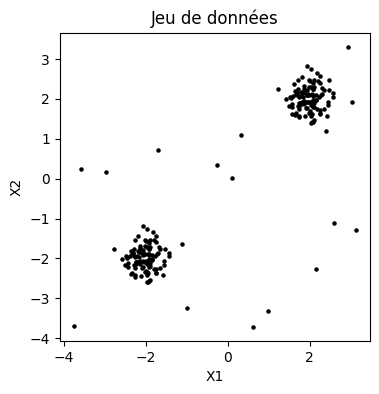

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from scipy.spatial.distance import cdist

# utiliser le méme jeux de donnée que le lab 3
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2)) 
X = np.r_[X_inliers, X_outliers]


plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], color='k', s=5)
plt.title("Jeu de données")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



**Implémentation de LOF:**

**Etapes du calcul de LOF pour un point de données $x_i$:**
* calcul de la distance et des k-voisins $N_k(x_i)$.
* Calcul de la distance (reachability distance) entre $x_i$ et chacun de ses voisins.
* Calcul de la densité de portée locale (lrd) de $x_i$.
* Calcul de l'indice LOF de $x_i$ en comparant sa densité locale à celle de ses voisins.

In [238]:

#Calculer les distances et les indices des k plus proches voisins pour chaque point 

def calcul_dist(X, k):
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, ind = nbrs.kneighbors(X)
   
    k_distance = distances[:, -1] 
    N_k = ind[:, 1:]  
    distances_voisin = distances[:, 1:]  
    return k_distance, N_k, distances_voisin


#calculer les distances de reachability pour chaque point
def calcul_reachability_dist(k_distance, distances_voisin, N_k):
    n_samples = len(N_k)
    reachability_dist = []
    for i in range(n_samples):
        reach_dists = np.maximum(k_distance[N_k[i]], distances_voisin[i])
        reachability_dist.append(reach_dists)
    return reachability_dist

#calcul de la densité local lrd pour chaque point
def calcul_reach_density(reachability_dist):
    n = len(reachability_dist)
    lrd = np.zeros(n)
    for i in range(n):
        lrd[i] = len(reachability_dist[i]) / np.sum(reachability_dist[i])
    return lrd

#calcul de l'indice LOF
def calcul_ind_lof(lrd, N_k):
    n = len(N_k)
    lof = np.zeros(n)
    for i in range(n):
        lrd_ratios = lrd[N_k[i]] / lrd[i]
        lof[i] = np.sum(lrd_ratios) / len(N_k[i])
    return lof

#calculer le LOF avec les etapes décrite précedement
def calcul_lof(X, k):
    k_distance, N_k, distances_voisin = calcul_dist(X, k)
    reachability_dist = calcul_reachability_dist(k_distance, distances_voisin, N_k)
    lrd = calcul_reach_density(reachability_dist)
    lof = calcul_ind_lof(lrd, N_k)
    return lof



**Comparaison avec scikit-learn :**

Afin de réaliser une comparaison nous allons calculer LOF avec mon implémentation et avec scikit-learn.




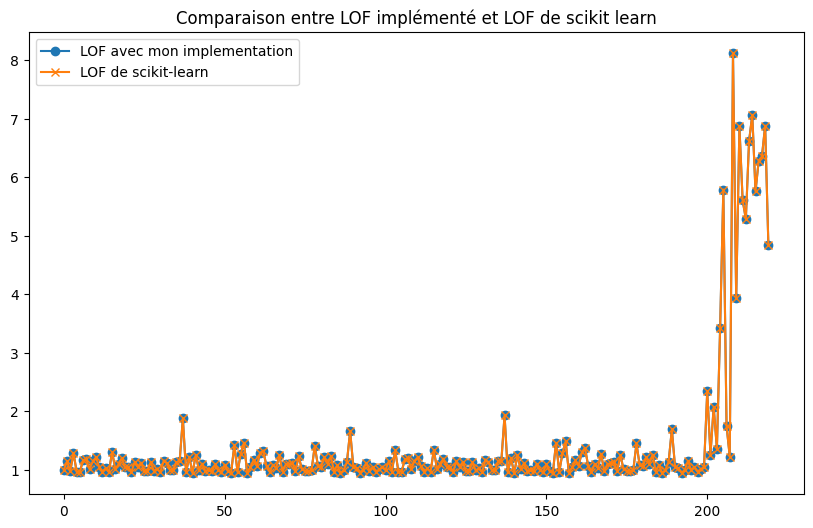

In [241]:
#J'ai choisit k= 20 pour calculer LOF  avec mon implémentation 
k = 20
lof = calcul_lof(X, k)

# calculer LOF avec scikit-learn
clf = LocalOutlierFactor(n_neighbors=k)
y_pred = clf.fit_predict(X)
lof_sklearn = -clf.negative_outlier_factor_

# comparaison avec scikit learn : tracer un graphe qui montre les indices 
# LOF calculés par mon implémentation et de scikit-learn pour chaque point

plt.figure(figsize=(10, 6))
plt.plot(lof, label='LOF avec mon implementation', marker='o')
plt.plot(lof_sklearn, label='LOF de scikit-learn', marker='x')
plt.title("Comparaison entre LOF implémenté et LOF de scikit learn")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.show()




**Analyse des résultats :**
La figure montre deux courbes qui représentent les indices LOF calculé avec mon implémentation et les indices LOF calculé avec scikit-learn .

**Comparaison entre les deux méthodes :**

les deux courbes sont prochent pour les indices LOF proches de 1, cela indique que les deux méthodes sont proches pour les point considérés comme inliers.


Les indices LOF élevés > 1 indique des points outliers.
Les points avec un indice LOF élevé ont une densité local faible que leurs voisins, cela signifie qu'ils sont plus isolés et donc sont outliers.

* Les indices LOF élevés identifient les outliers dans les deux méthodes.

**b)-Combiner LOF avec IF**

* **LOF(Local Outlier Factor)**: détecte les anomalies locales, les points ayant une densité locale plus faible par rapport à leurs voisins (évaluer la densité locale des données)
* **IF (Isolation Forest)**: détecte les anomalies globales, les points qui sont isolés dans l’ensemble des données

* En combinant ces deux approches, on peut identifier les anomalies locales et globales dans un jeu de données.

* Indice LOF : mesure la densité locale par rapport à ses voisins.
* Indice IF : évalue la facilité avec laquelle un point peut être isolé dans l'ensemble des données.

**La méthode pour combiner LOF+IF:**

LOF_IF = $\alpha \cdot \text{LOF}_k + \beta \cdot IF_{ind}$


* Les points avec des scores combinés élevés sont des outliers.

**Étapes pour combiner LOF et IF**

1. En utilisant l’algorithme LOF on calcule l’indice $LOF_k(x_i)$ pour chaque point.

2. Calculer l’indice IF en utilisant l’algorithme Isolation Forest.

3. Normaliser les indices pour qu’ils soient dans le même intervalle $[0,1]$:


4. Combiner les deux méthodes en utilisant :

LOF-IF = $\alpha \cdot \text{LOF\_normalisé} + \beta \cdot \text{IF\_normalisé}$


comparaison entre LOF et IF : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_outlier_detection_bench.html

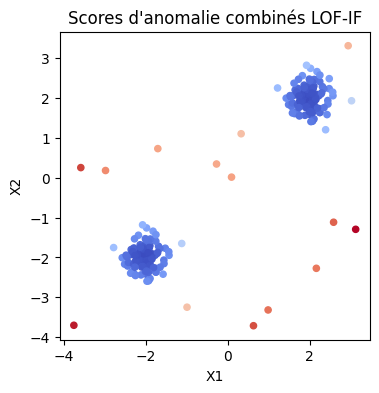

In [ ]:
from sklearn.ensemble import IsolationForest

#quand alpha = 0.5 ca veut dire que les score de IF et LOF sont pondéré de maniere egale 

def lof_iforest(X, k, alpha):
    
    #Calculer les indices LOF 
    lof = LocalOutlierFactor(n_neighbors=k)
    lof.fit(X)
    lof_score = -lof.negative_outlier_factor_  
    
    #Calculer les indices IF
    iforest = IsolationForest(random_state=42)
    iforest.fit(X)
    if_score = -iforest.score_samples(X)  
    
    #Normaliser les indices pour avoir les memes intervalles 
    lof_norm = (lof_score - np.min(lof_score)) / (np.max(lof_score) - np.min(lof_score))
    if_norm = (if_score - np.min(if_score)) / (np.max(if_score) - np.min(if_score))
    
    #combiner les deux methodes LOF+IF
    lof_if = alpha * lof_norm + (1 - alpha) * if_norm
    
    return lof_if, lof_norm, if_norm


# Calculer les scores combinés
lof_if, lof, iforest = lof_iforest(X, k=20, alpha=0.5)

# affichage des résultats 
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=lof_if, cmap='coolwarm', s=20)
plt.title("Scores d'anomalie combinés LOF-IF")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


**Analyse de la figure**

La figure représente des données  ou on combine les scores LOF et IF.

* Bleu foncé :points considérés comme inliers
* Rouge foncé : points considérés comme outliers

* Isolation Forest (IF) : Les points éloigné ( en rouge) sont isolé dans l'ensemble des données, ce qui facilite à identifier les outliers.
* Local Outlier Factor (LOF):  Les points éloigné ont une densité locale faible comparée à leurs voisins proches(sont des outliers).

**c)-** Comparaison entre LOF, IF et LOF+IF:

L'objectif est de démontrer la différence entre les résultats de LOF , IF et LOF+IF et la différence dans la détection des anomalies.



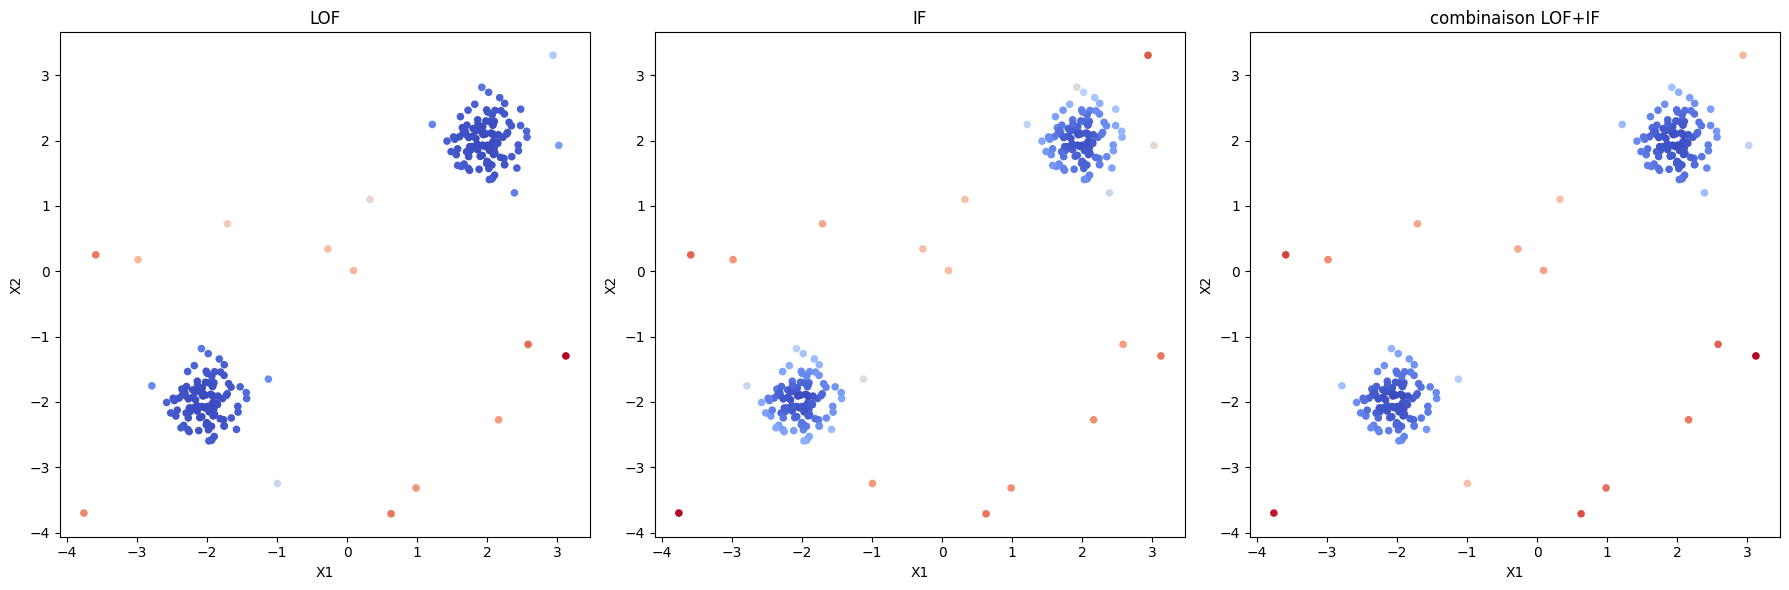

In [249]:
# j'ai utlisé alpha = 0.5 qui veut dire que les scores LOF et IF sont pondéré de
#  maniere egale 


plt.figure(figsize=(18, 6))

# LOF
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=lof, cmap='coolwarm', s=20)
plt.title("LOF")
plt.xlabel("X1")
plt.ylabel("X2")

# IF
plt.subplot(1, 3, 2) 
plt.scatter(X[:, 0], X[:, 1], c=iforest, cmap='coolwarm', s=20)
plt.title("IF")
plt.xlabel("X1")
plt.ylabel("X2")

# LOF+IF
plt.subplot(1, 3, 3) 
plt.scatter(X[:, 0], X[:, 1], c=lof_if, cmap='coolwarm', s=20)
plt.title("combinaison LOF+IF")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.show()


a) LOF (Local Outlier Factor)

* Utilisé pour détecter des anomalies locales, les points proches des clusters.

b) IF (Isolation Forest)

* idéale pour détecter des anomalies globales, les points éloignés des clusters principaux.

c) LOF+IF (Combinaison)

* Une méthode hybride qui combine les deux approches pour fournir une bonne détection des anomalies.


## Partie 3 

Contrairement aux approches de **clustering bottom-up**, les méthodes **top-down** commencent avec **un seul cluster** (un modèle à une seule composante) et augmentent progressivement le nombre de clusters en introduisant et en ajustant de nouvelles composantes dans le modèle.
Le principe général consiste à démarrer avec un modèle comportant **$k=1$ cluster**, à ajuster ce modèle aux données, puis à **ajouter incrémentalement** de nouveaux clusters en réestimant le modèle jusqu’à atteindre un nombre final de clusters prédéfini.

Le choix du **modèle de clustering** est une première étape importante. On peut utiliser soit un modèle **à centroïdes**, comme le **k-means**, soit un modèle **probabiliste**, tel que les **mélanges gaussiens (GMM)**. Dans les deux cas, l’apprentissage repose sur une **procédure itérative** visant à minimiser une erreur de clustering ou à maximiser une vraisemblance.

L’élément clé de l’approche incrémentale réside dans la manière dont un **nouveau cluster est introduit** dans le modèle. Plusieurs stratégies sont envisagées :

La stratégie de **bisecting** consiste à sélectionner un cluster existant et à le diviser en deux sous-clusters. Le choix du cluster à scinder se fait généralement sur la base de son **erreur interne**, par exemple celui qui présente la plus grande dispersion. Une fois sélectionné, un second centroïde est initialisé à partir d’un point du cluster, puis une **classification à deux clusters** est effectuée uniquement sur les points de ce cluster. Une étape optionnelle permet ensuite de réajuster l’ensemble des **$k+1$ clusters** via une itération complète de k-means, ce qui modifie alors l’ensemble des centroïdes.

La stratégie **globale incrémentale** adopte une approche plus exhaustive. Chaque point du jeu de données est testé comme **candidat possible pour le nouveau centroïde**, et pour chacun de ces candidats, un modèle à **$k+1$ clusters** est entraîné. Le modèle retenu est celui qui produit la **plus forte réduction de l’erreur globale**. Cette méthode est plus coûteuse mais garantit une meilleure exploration de l’espace des solutions.

La variante **fast global** est une approximation de la méthode globale. Elle évalue chaque point candidat après une **seule mise à jour** de k-means, sans itérer jusqu’à convergence. Cette simplification permet de réduire fortement le coût de calcul, tout en conservant une amélioration significative par rapport à une initialisation aléatoire.

Enfin, la méthode **global++** s’inspire du principe de **k-means++**. Au lieu de tester tous les points du dataset, un sous-ensemble de points est sélectionné aléatoirement selon une distribution qui favorise les points éloignés des centroïdes existants. Cette procédure est répétée plusieurs fois, et la meilleure initialisation est retenue. Elle offre un bon compromis entre **qualité de clustering** et **complexité computationnelle**.

Dans les expérimentations, le nombre final de clusters **$k^*$** est supposé connu. Les différentes méthodes incrémentales sont d’abord implémentées en utilisant **k-means** comme algorithme de base, puis étendues au cas des **mélanges gaussiens (GMM)**. Les approches sont comparées sur des applications pratiques, notamment le **clustering de couleurs**, ainsi que sur des **données synthétiques** constituées d’une grille bidimensionnelle régulière de clusters générés à partir de distributions gaussiennes. L’analyse porte sur l’**erreur de clustering**, la stabilité des solutions et l’impact de la variance des données.

Enfin, le cadre est élargi en considérant les **GMM** comme modèle de base, entraînés à l’aide de l’algorithme **EM (Expectation-Maximization)**. Une attention particulière est portée aux difficultés posées par l’application du principe de **bisecting** dans un contexte probabiliste, ainsi qu’aux heuristiques permettant d’adapter cette stratégie à ce type de modèles.



## Solution: 

l'objectif est d'utiliser des approches incrémentales pour le clustering, en utilisant des modèles tels que k-means et Gaussian Mixture Models (GMM). 

On utilise des méthodes de clustering basées sur une approche descendante (top-down), où l'on commence avec un seul cluster, puis on ajoute progressivement des clusters.

**L'algorithme générale:**

**1-** L'algorithme commencer avec k=1 (un seul cluster englobant toutes les données).

**2-** Ajuster $M_k$ le modèle actuel avec k clusters pour qu'il s'adapte au mieux aux données.

**3-**  Ajouter un nouveau composant(augmenter k) et répéter les étapes jusqu’à atteindre le nombre final k∗

**Les modéles utilisés:**

**K-means**: Partage les données en k clusters en minimisant les distances au carré entre chaque point et son centre.

**GMM**: Modélise les données comme une combinaison de distributions gaussiennes.

**Stratégies d'incrémentation des clusters**

* Méthode de Bissection
* Méthode Globale
* Fast global
* Global ++

**a)-** Implémentation des algorithmes:


**Etapes de la méthode globale :**

* Initialiser K-Means avec un seul cluster.
* Augmenter le nombre de clusters de 1 à $k^*$
    * Pour chaque point: 
        * ajouter ce point comme centroïde.
        * Ajuster K-Means avec ce nouveau centroïde.
        * Calculer l'erreur de clustering.
* Choisir le modèle qui minimise l'erreur de clustering..
* Répéter jusqu'à atteindre le nombre final de clusters k*.



In [250]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

# k_max : Nombre maximum de clusters à générer

def global_increment(data, k_max):

    N, D = data.shape
    #commencer avec un seule centroides
    c = [np.mean(data, axis=0)]
    
    # Augmenter le nombre de clusters jusqu'à k_max
    for k in range(1, k_max):
        min_error = np.inf
        best_c = None

        for i in range(N):
            new_c = np.vstack([c, data[i]])
            
            #ajuster le modéle avec k-means avec k+1 cluster
            kmeans = KMeans(n_clusters=k+1, init=new_c, n_init=1, max_iter=300)
            kmeans.fit(data)
            error = kmeans.inertia_

            # Vérifier si ce modèle est meilleur
            if error < min_error:
                min_error = error
                best_c = kmeans.cluster_centers_

        # Mettre à jour les centroïdes avec le meilleur modèle trouvé
        c = best_c

    # Ajuster le modèle final avec tous les centroïdes trouvés
    final_model = KMeans(n_clusters=k_max, init=c, n_init=1, max_iter=300)
    final_model.fit(data)
    return final_model


**Etapes de la méthode fast globale :**

* Initialiser un cluster avec k=1
* Augmenter le nombre de clusters de 1 à $k^*$ :
  * pour chaque point des données: 
    * Ajouter ce point comme centroïde.
    * Effectuer une seule itération de mise à jour de K-Means.
    * calculer l'erreur.
* Répéter jusqu'à atteindre k*

In [251]:

def fast_global(data, k_max):
    N, D = data.shape
    #initialiser avec un seul centroïde
    c = [np.mean(data, axis=0)]

    for k in range(1, k_max):
        min_error = np.inf
        best_c = None

        for i in range(N):
            #ajouter le point candidat comme un nouveau centroïde
            new_c = np.vstack([c, data[i]])

            #ajuster K-Means avec une itération
            kmeans = KMeans(n_clusters=k+1, init=new_c, n_init=1, max_iter=1, random_state=0)
            kmeans.fit(data)
            error = kmeans.inertia_

            #voir si le modèle est meilleur
            if error < min_error:
                min_error = error
                best_c = data[i]

        c = np.vstack([c, best_c])

    final_model = KMeans(n_clusters=k_max, init=c, n_init=1, max_iter=300, random_state=0)
    final_model.fit(data)
    return final_model


**Etapes de la méthode globale++ :**

* Initialiser un cluster avec k=1
* Augmenter le nombre de clusters de 1 à $k^*$ :
  * Utiliser le principe de K-Means++ pour sélectionner les nouveaux centroïdes.
  * Calculer les distances entre les points et les centroïdes existants.
  * Calculer les probabilités de sélection pour choisir m candidats.
  * pour chaque condidat parmi les m: 
    * Ajouter ce candidat comme un nouveau centroïde.
    * calculer l'erreu et choisir le point qui améliore le plus.
* Répéter jusqu'à atteindre


In [ ]:

def global_p_p(data, k_max, m_ratio=0.1):

    # Initialiser avec un cluster 
    N, D = data.shape
    kmeans = KMeans(n_clusters=1, random_state=0).fit(data)
    c = kmeans.cluster_centers_
    m = int(m_ratio * N)
    
    # Ajouter des clusters jusqu'à k_max
    for k in range(1, k_max):
        #calculer les distance entre les point et les centres 
        distance = np.min([np.linalg.norm(data - c, axis=1) for c in c], axis=0)
        
        #calculer les proba pour chaque point
        probabilité = distance / np.sum(distance)

        best_c = None
        min_error = np.inf
        
        #tester m condidat select en fonction des probabilités
        for _ in range(m):

            idx = np.random.choice(N, p=probabilité)
            new_c = np.vstack([c, data[idx]])

            kmeans = KMeans(n_clusters=k+1, init=new_c, n_init=1, max_iter=300)
            kmeans.fit(data)
            
            error = kmeans.inertia_
            if error < min_error:
                min_error = error
                best_c = data[idx]
        c = np.vstack([c, best_c])

    final_model = KMeans(n_clusters=k_max, init=c, n_init=1, max_iter=300)
    final_model.fit(data)
    return final_model


Centres avec Global Increment :
 [[-8.91925181  7.38961974]
 [-6.88093348 -6.9950069 ]
 [ 4.71067027  1.98409754]
 [-2.64387445  9.04103329]
 [ 2.14065099  4.38989034]]
Centres avec Fast Global :
 [[ 2.14065099  4.38989034]
 [-6.88093348 -6.9950069 ]
 [-2.64387445  9.04103329]
 [-8.91925181  7.38961974]
 [ 4.71067027  1.98409754]]
Centres avec Global++ :
 [[-2.64387445  9.04103329]
 [-6.88093348 -6.9950069 ]
 [ 4.71067027  1.98409754]
 [-8.91925181  7.38961974]
 [ 2.14065099  4.38989034]]


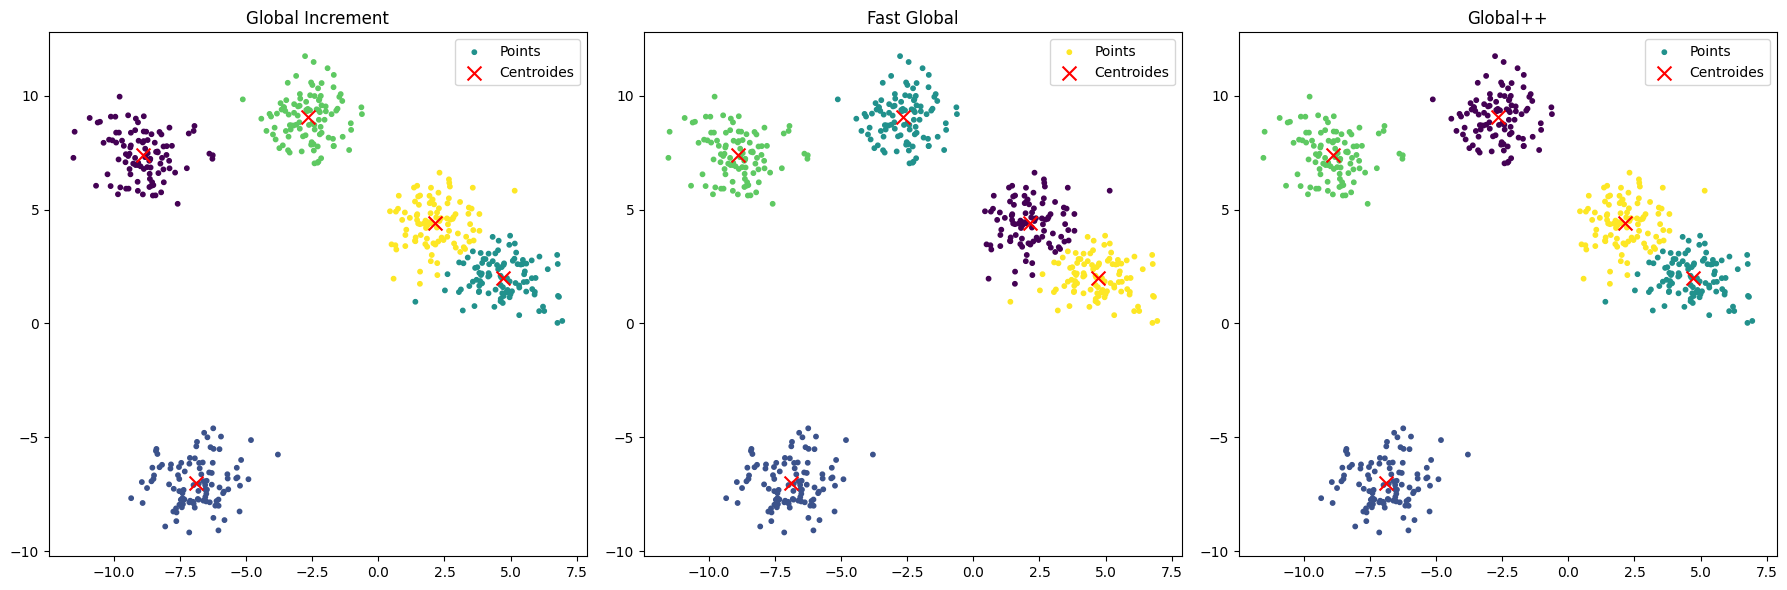

Temps pour Global Increment : 10.16 secondes
Temps pour Fast Global : 9.06 secondes
Temps pour Global++ : 0.97 secondes


In [256]:
#effectuer une comparaison entre les méthodes en utilisant les données de 
#et mesrer le temps pour évaluer les performances

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time

data, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

t0 = time.time()
model_global = global_increment(data, k_max=5)
time_global = time.time() - t0

t0 = time.time()
fast_model = fast_global(data, k_max=5)
time_fast = time.time() - t0

t0 = time.time()
model_global_pp = global_p_p(data, k_max=5)
time_global_pp = time.time() - t0

print("Centres avec Global Increment :\n", model_global.cluster_centers_)
print("Centres avec Fast Global :\n", fast_model.cluster_centers_)
print("Centres avec Global++ :\n", model_global_pp.cluster_centers_)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c=model_global.labels_, cmap='viridis', s=10, label="Points")
plt.scatter(model_global.cluster_centers_[:, 0], model_global.cluster_centers_[:, 1], c='red', marker='x', s=100, label="Centroides")
plt.title("Global Increment")
plt.xlabel("")
plt.ylabel("")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(data[:, 0], data[:, 1], c=fast_model.labels_, cmap='viridis', s=10, label="Points")
plt.scatter(fast_model.cluster_centers_[:, 0], fast_model.cluster_centers_[:, 1], c='red', marker='x', s=100, label="Centroides")
plt.title("Fast Global")
plt.xlabel("")
plt.ylabel("")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(data[:, 0], data[:, 1], c=model_global_pp.labels_, cmap='viridis', s=10, label="Points")
plt.scatter(model_global_pp.cluster_centers_[:, 0], model_global_pp.cluster_centers_[:, 1], c='red', marker='x', s=100, label="Centroides")
plt.title("Global++")
plt.xlabel("")
plt.ylabel("")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Temps pour Global Increment : {time_global:.2f} secondes")
print(f"Temps pour Fast Global : {time_fast:.2f} secondes")
print(f"Temps pour Global++ : {time_global_pp:.2f} secondes")


**Comparaison entre les méthodes :**
* **Greedy Global:** Teste tous les points comme candidats pour un nouveau centre, ajuste complètement K-Means pour chaque essai et conserve le meilleur.
elle est lente pour de grandes données.

* **Fast Global :** Teste tous les points mais effectue une seule mise à jour K-Means après avoir ajouté un nouveau centre ce qui réduit le temps d'execution par rapport à global increment.

* **Global++:** Utilise le principe de k-means++ pour sélectionner m candidats basés sur les distances.


**b)- Analyse de la propriété de Bisecting avec et sans l'etape B3 et la comparaison avec la méthode globale incrémental**

Dans la méthode bisecting, chaque nouveau cluster est formé en divisant un cluster existant en deux.

**sans B3:**
*  Les clusters qui ne sont pas divisés restent comme ils sont et l'erreur globale est moins bien optimisée.

**avec B3 :**
* lorsqu'on ajoute l'étape B3 cela implique une mise à jour complète de k-means avec k+1 clusters.
* Tous les clusters sont mis à jour, ce qui améliore le résultat global.
* Proche des méthodes globales, car elle met à jour tous les clusters après chaque division.

**global incrémentale:**
* Teste tous les points pour choisir le meilleur nouveau centre, ce qui offre une meilleure optimisation.


**c)-**  réaliser des expériences de regroupement de couleurs en utilisant l'image chinoise déjà donnée et tester les variations Greedy Global Incremental, Fast Global, et Global++ pour le regroupement des couleurs.

**L'experience**: 

* Chargement et prétraitement de l'image : utiliser l'exemple du lab4 (china.jpg)

* Tester chaque méthode (Greedy Global Incremental, Fast Global, Global++).

* Evaluer les performances et comparer le temps de chaque méthode.

**Remarque :** j'ai limité le n_colors à 64 car pour 256 ca prend enormément de temps. 

Traitement avec la méthode : global


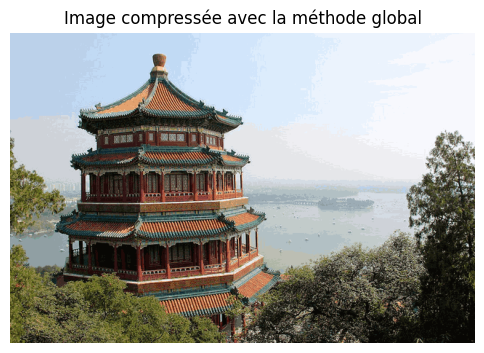

Temps d'exécution pour la méthode global : 513.06 secondes
Traitement avec la méthode : fast


c:\Users\DRISS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (62) found smaller than n_clusters (63). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\DRISS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (63) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


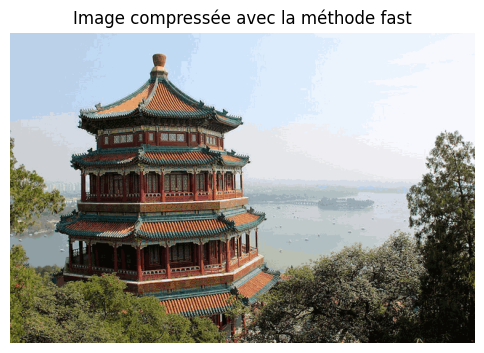

Temps d'exécution pour la méthode fast : 458.54 secondes
Traitement avec la méthode : global++


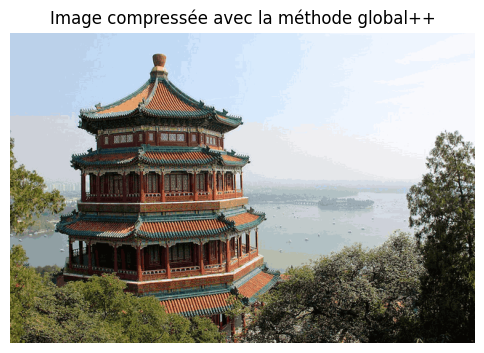

Temps d'exécution pour la méthode global++ : 64.61 secondes


In [222]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import time

n_colors = 64

#Charger et prétraitemant de l'image 
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

# Prendre un échantillon aléatoire de 1000 pixels
image_array_sample = shuffle(image_array, random_state=0)[:1000]

#reconstruire l'image
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


methods = ["global", "fast", "global++"]

results = {}
#mesurer le temps d'execution pour comparer les méthodes 
time_exec = {}

for method in methods:
    print(f"Traitement avec la méthode : {method}")
    t0 = time.time()
    
    #tester chaque méthode 
    if method == "global":
        model = global_increment(image_array_sample, n_colors)
    elif method == "fast":
        model = fast_global(image_array_sample, n_colors)
    elif method == "global++":
        model = global_p_p(image_array_sample, n_colors)

    t_final = time.time()
    execution_time = t_final - t0
    time_exec[method] = execution_time

    labels = model.predict(image_array)
    results[method] = {
        "centroids": model.cluster_centers_,
        "labels": labels,
    }

    compressed_image = recreate_image(model.cluster_centers_, labels, w, h)
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title(f"Image compressée avec la méthode {method}")
    plt.imshow(compressed_image)
    plt.show()
    
    #afficher la durée de chque méthode 
    print(f"Temps d'exécution pour la méthode {method} : {time_exec[method]:.2f} secondes")




**d)-** 
**Construire le jeu de données demandé** 


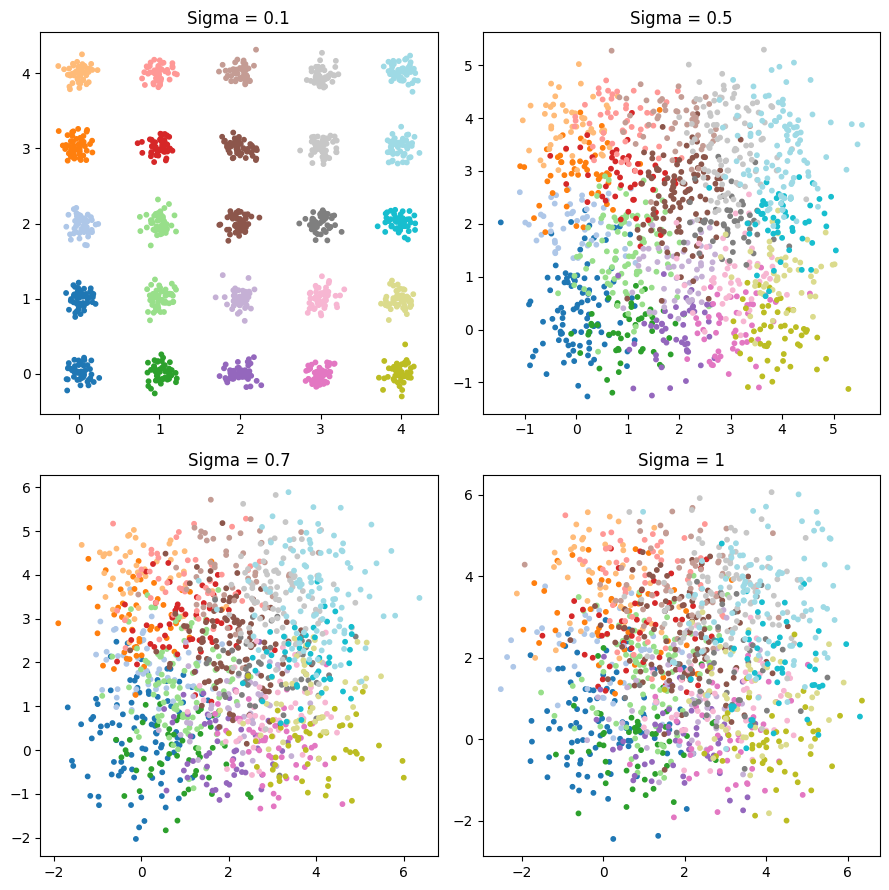

In [257]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(taille, N, sigma):
    centers = []  
    for i in range(taille):
        for j in range(taille):
            centers.append((i, j))  

    data = []
    label = []
    for idx, c in enumerate(centers):
        points = np.random.normal(loc=c, scale=sigma, size=(N, 2))
        data.append(points)
        label += [idx] * N  

    data = np.vstack(data)
    label = np.array(label)
    return data, label

# Taille de la grille 5x5 pour 25 clusters et chaque cluster contient 50 points
taille = 5
N = 50
sigmas = [0.1, 0.5, 0.7, 1]
dataset = {}

# Générer des données pour chaque valeur de sigma
for sigma in sigmas:
    X, y = generate_data(taille, N, sigma)
    dataset[sigma] = (X, y)

fig, axes = plt.subplots(2, 2, figsize=(9, 9))
axes = axes.flatten()

for i, sigma in enumerate(sigmas):
    X, y = dataset[sigma]
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20', s=10)
    ax.set_title(f"Sigma = {sigma}")
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()


* Avec un petit $\sigma$, les points sont bien regroupés autour du centre du cluster.
* avec un grand $\sigma$ les points sont plus dispersés, et s'approcher des clusters voisins.


L'objectif de cette partie est de comparer les performances des différentes méthodes: 

* Flat GMM: c'est GMM avec un nombre fixe de clusters k= 25
* Incremental GMM avec Bisecting Splits : GMM qui est construit en divisant successivement les clusters.
* Incremental GMM basé sur le principe global.

Ensuite, comparer la durée de chaque méthode pour évaluer la rapidité et comparer les performances.



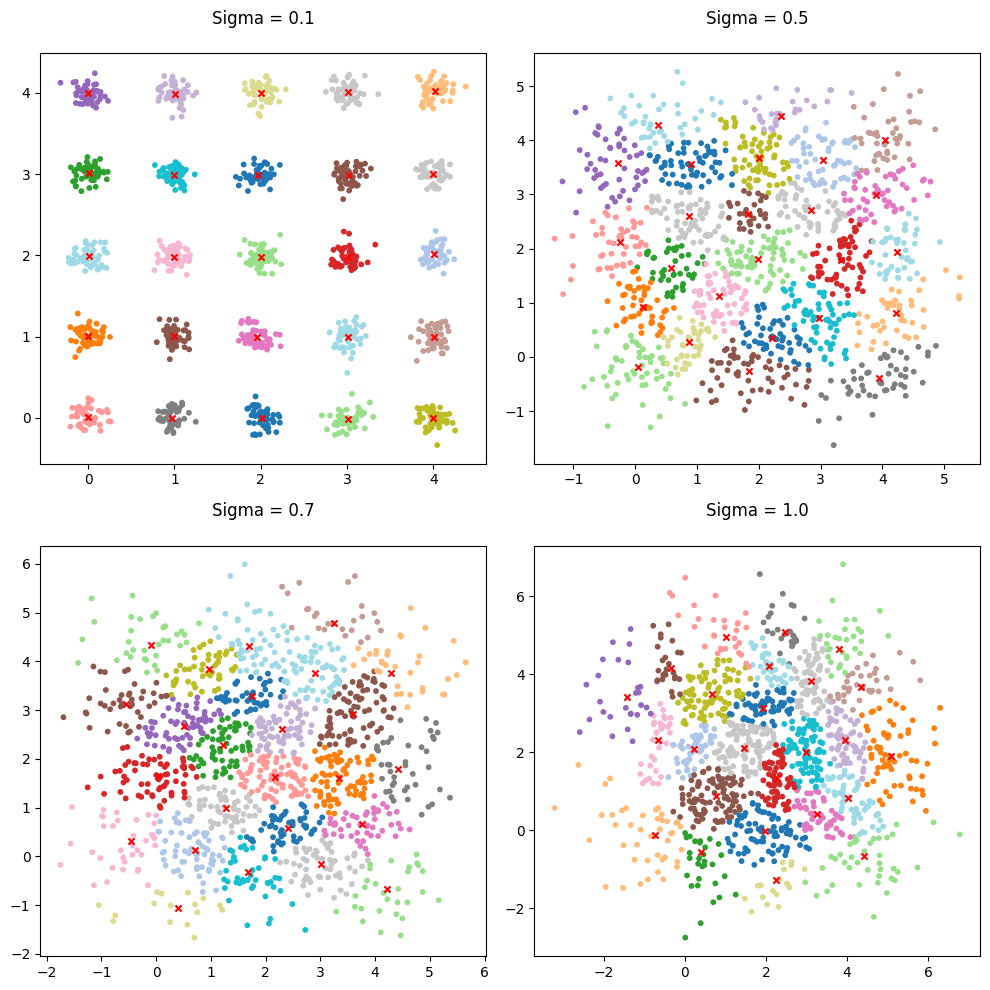

avec la méthode gmm k fixe: 

Sigma = 0.1: Temps = 0.03 sec
Sigma = 0.5: Temps = 0.09 sec
Sigma = 0.7: Temps = 0.07 sec
Sigma = 1.0: Temps = 0.12 sec


In [260]:
import time
from sklearn.mixture import GaussianMixture

# Fonction GMM avec k fixe
def fixe_gmm(data, k):

    gmm = GaussianMixture(n_components=k, init_params='kmeans', random_state=0, max_iter=300)
    gmm.fit(data)
    labels = gmm.predict(data)
    return labels, gmm.means_

k = 25 
sigmas = [0.1, 0.5, 0.7, 1.0]
taille = 5 
N = 50 

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

time_exec = {}

for i, sigma in enumerate(sigmas):

    X, y = generate_data(taille=taille, N=N, sigma=sigma)

    t0 = time.time()
    labels, centres = fixe_gmm(X, k)
    t_final = time.time()
    time_exec[sigma] = t_final - t0


    # Afficher les clusters
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    ax.scatter(centres[:, 0], centres[:, 1], c='red', s=20, marker='x',facecolors='none', label="Centres")
    ax.set_title(f"Sigma = {sigma}\n")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

# Afficher les temps d'exécution 
print("avec la méthode gmm k fixe: \n")
for sigma in sigmas:
    print(f"Sigma = {sigma}: Temps = {time_exec[sigma]:.2f} sec")


**Incremental GMM avec bisecting splits:**

L'objectif de cette méthode est de créer un modèle GMM en ajoutant des clusters progressivement. On commence avec un seul cluster, puis on divise les clusters un par un, jusqu'à obtenir k=25 clusters. Cette méthode utilise l'algorithme Bisecting K-Means.



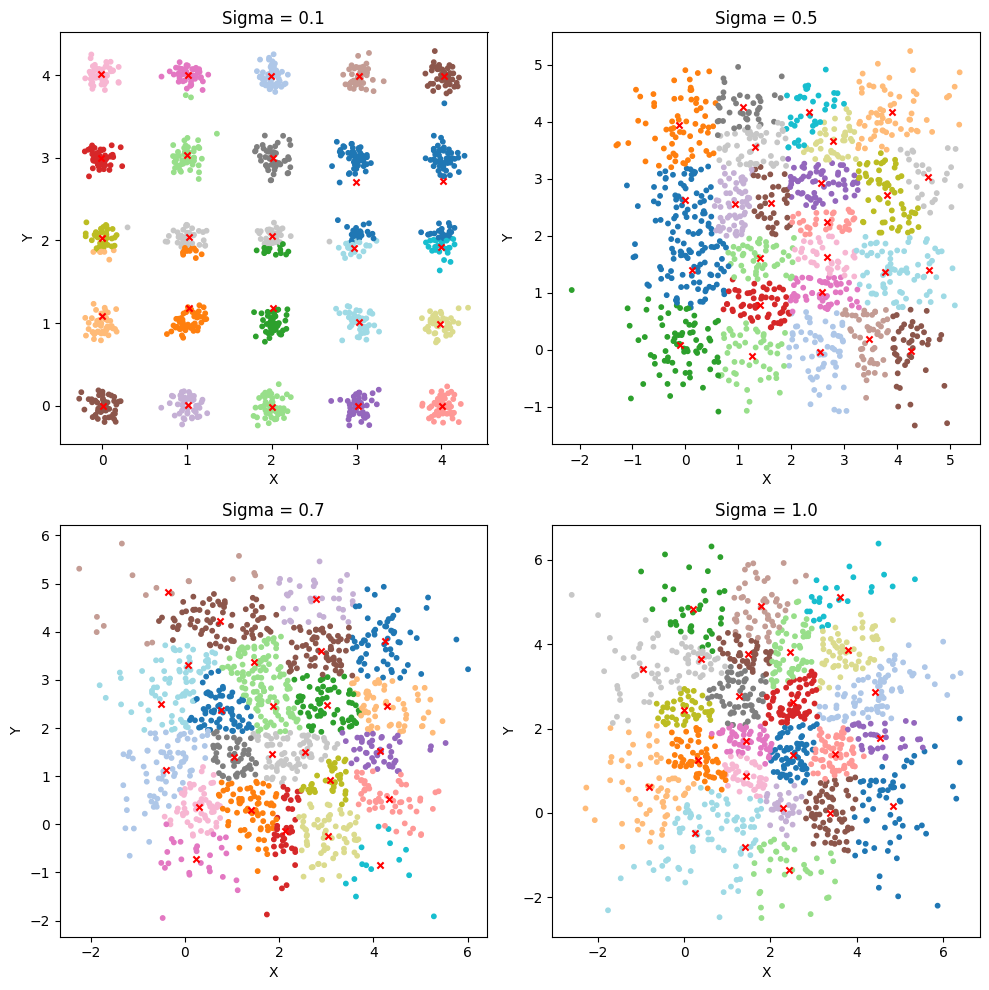

Avec la méthode Incremental GMM avec Bisecting Splits
Sigma = 0.1: 0.20 secondes
Sigma = 0.5: 0.20 secondes
Sigma = 0.7: 0.19 secondes
Sigma = 1.0: 0.19 secondes


In [261]:
def gmm_bisecting(data, target_k):

    #initialiser avec un cluster qui contient tous les points
    c = [np.arange(len(data))]
    
    #tant que le nbr de cluster est inferieur à target
    #la boucle divise un cluster à chaque étape, jusqu'à atteindre target
    while len(c) < target_k:
        
        size = [len(cluster) for cluster in c]
        idx = np.argmax(size)
        cluster_split = c.pop(idx)
        
        #appliquer GMM avec 2 composantes sur ce cluster 
        gmm = GaussianMixture(n_components=2, random_state=0)
        gmm.fit(data[cluster_split])
        labels = gmm.predict(data[cluster_split])
        
        #ajouter les deux sous clusters à la liste de clusters
        c.append(cluster_split[labels == 0])
        c.append(cluster_split[labels == 1])

    label_final = np.zeros(len(data), dtype=int)
    for cluster_idx, cluster in enumerate(c):
        label_final[cluster] = cluster_idx

    centre = np.array([data[cluster].mean(axis=0) for cluster in c])

    return label_final, centre


target_k = 25
sigmas = [0.1, 0.5, 0.7, 1.0]
taille = 5
N = 50

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

time_exec = {}
for i, sigma in enumerate(sigmas):
    X, y = generate_data(taille=taille, N=N, sigma=sigma)

    #mesurer le temps pour les performances
    t0 = time.time()
    labels, centre = gmm_bisecting(X, target_k)
    t_final = time.time()
    time_exec[sigma] = t_final - t0

    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    ax.scatter(centre[:, 0], centre[:, 1], c='red', s=20, marker='x', facecolors='none', label="Centres")
    ax.set_title(f"Sigma = {sigma}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()

print("Avec la méthode Incremental GMM avec Bisecting Splits")
for sigma, t in time_exec.items():
    print(f"Sigma = {sigma}: {t:.2f} secondes")


**Incremental GMM basé sur le principe global:**
* Commencer avec un modèle GMM avec un seul cluster.
* pour chaque point : 
  * Tester ce point comme un nouveau centre.
  * Ajuster un modèle avec ce centre.
  * Calculer l'erreur et choisir le point qui améliore le plus le modèle.
* répeter jusqu'à kmax.


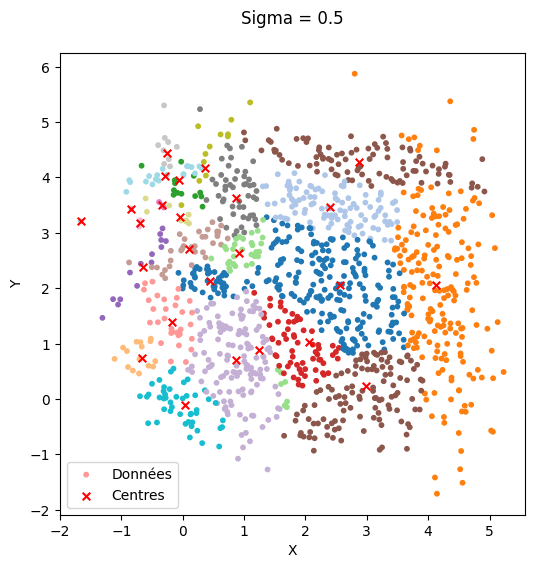

Avec la méthode Incremental GMM basée sur le principe global
Sigma = 0.5: Temps = 2012.41 secondes


In [262]:
from sklearn.mixture import GaussianMixture
import numpy as np

def global_gmm(data, k_max):
    N, D = data.shape
    
    #Commencer avec un modèle GMM contenant un seul cluster.
    gmm = GaussianMixture(n_components=1, random_state=0, max_iter=40)
    gmm.fit(data)
    c = gmm.means_
    
    #ajouter des composants jusqu'a kmax
    for k in range(2, k_max + 1):
        min_error = np.inf
        best_c = None

        #Tester ce point comme un nouveau centre
        for i in range(N):
            candidate = data[i].reshape(1, -1)
            new_c = np.vstack([c, candidate])

            #ajuster un GMM avec ces nouveaux centre
            gmm_candidate = GaussianMixture(n_components=k, means_init=new_c, random_state=0, max_iter=40)
            gmm_candidate.fit(data)
            
            #calculer l'erreure
            error = -gmm_candidate.score(data) * N 
            
            #si il améliore le modéle 
            if error < min_error:
                min_error = error
                best_c = candidate

        c = np.vstack([c, best_c])

    final_model = GaussianMixture(n_components=k_max, means_init=c, random_state=0, max_iter=40)
    final_model.fit(data)
    return final_model


k_max = 25
sigma = 0.5
taille = 5
N = 50

X, y = generate_data(taille=taille, N=N, sigma=sigma)

#mesurer le temps pour les performances
t0 = time.time()
gmm_model = global_gmm(X, k_max)
t_final = time.time()
execution_time = t_final - t0

labels = gmm_model.predict(X)
centres = gmm_model.means_

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10, label="Données")
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=30, marker='x', facecolors='none', label="Centres")
plt.title(f"Sigma = {sigma}\n")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Avec la méthode Incremental GMM basée sur le principe global")
print(f"Sigma = {sigma}: Temps = {execution_time:.2f} secondes")


**Comparaison des performances**

En comparant les résultats on remarque que 
* le GMM Fixe est le plus performant car il est plus rapide.
* GMM bisecting il prend un peut plus de temps car il divise progressivement les clusters.
* GMM global est le plus lent car il teste chaque point comme condidat.


**e)-**

GMM utilise l'algorithme Expectation-Maximization (EM) pour ajuster les paramètres des distributions gaussiennes.

**implémenter un GMM avec EM :** L'algorithme EM dans GaussianMixture se déroule lorsque on appelle la méthode fit(data).

* L'algorithme répéte les etapes E et M jusqu'à ce que la log-vraisemblance converge ensuite il calcule la log-vraisemblance moyenne pour évaluer le modèle.

**Expectation-Maximization (EM):**: est une méthode itérative pour trouver les paramètres maximisant la vraisemblance dans des modèles comme GMM.

ses etapes :

**Étape E (Expectation)**: Calculer la probabilité que chaque point de données appartienne à chaque composante gaussienne.

**Étape M (Maximization)**: Mettre à jour les paramètres du modèle (moyennes, covariances...) en maximisant la vraisemblance totale et en tenant compte des probabilités calculées à l'étape E.

C'est information sont dans le livre suivant  : https://apiacoa.org/publications/teaching/mixture-models/tp-em.pdf



**f)-** 

Le principal probléme d'appliquer le principe de bisecting dans le cas du GMM est :
* les GMM utilisent des assignations probabilistes, ce qui complique la décision de comment diviser un cluster.
* Une mauvaise initialisation peut entraîner à une mauvaise convergence.

**heuristique :**
* Commencez avec un seul cluster.
* Répéter les étapes de division jusqu'à atteindre le nombre de clusters souhaité.
* Après chaque division, appliquer l'algorithme EM pour affiner les paramètres du modèle.

## Partie 4 

Dans cette partie du projet, on s’intéresse à la **repondération des distances** entre les points d’un jeu de données $( X = {x_1, \ldots, x_N} \subset \mathbb{R}^d )$. À partir d’une distance initiale **$dist((x_i, x_j))$**, l’objectif est de définir une nouvelle distance $dist’((x_i, x_j))$ en introduisant un **poids positif ( $w_{ij}$ )**, afin de rapprocher les points jugés **fortement liés** et d’éloigner ceux qui sont **faiblement liés**. Cette transformation permet d’exploiter des informations supplémentaires sur la structure des données pour améliorer des tâches telles que le **clustering**, la **classification** ou la **détection d’anomalies**.

Une première approche repose sur l’utilisation de **noyaux (kernels)**, et en particulier du **noyau RBF (Radial Basis Function)**. Dans ce cadre, les poids **( w_{ij} )** sont définis comme une fonction décroissante de la distance euclidienne entre les points, contrôlée par un paramètre **$( \gamma )$** lié à l’échelle $( \sigma )$. Cette méthode constitue une approche **locale et continue**, qui renforce les relations entre points proches tout en atténuant celles entre points éloignés.

Une seconde famille de méthodes s’appuie sur des approches **basées sur le clustering**, considérées comme des stratégies de plus haut niveau. L’idée centrale est d’exploiter la **structure de regroupement** des données pour définir les poids **( $w_{ij}$ )**.
Dans le cas du **clustering plat**, comme le **k-means**, plusieurs partitions peuvent être générées et les poids sont alors définis en fonction de la **fréquence à laquelle deux points appartiennent au même cluster**.
Dans le cadre du **clustering hiérarchique**, tel que la **classification ascendante hiérarchique (HAC)** ou le **bisecting k-means**, la relation entre deux points est mesurée par la **profondeur dans la hiérarchie** à laquelle ils se retrouvent séparés, fournissant une mesure de proximité structurée.
Enfin, une approche basée sur le **clustering incrémental**, comme le **global k-means**, est également envisagée. Bien que son mécanisme ne soit pas directement défini, elle nécessite la conception d’une **mesure cohérente** exploitant l’évolution progressive des clusters lors de leur construction.

L’implémentation comprend l’ensemble de ces stratégies : une méthode **basée sur les noyaux** et plusieurs méthodes **basées sur le clustering**, y compris une proposition originale pour le cas incrémental. Afin d’évaluer leur comportement, des **données synthétiques** similaires à celles utilisées précédemment sont générées. Ces expériences permettent de valider la **cohérence des implémentations** et d’analyser l’impact des différentes stratégies de repondération sur la structure des distances et la représentation des relations entre les points.


## Solution :

L’objectif est de modifier les distances entre des points de données pour rapprocher ceux qui sont liés et éloigner les autres. Cela se fait en utilisant des méthodes comme les noyaux (RBF) ou des techniques de clustering (k-means, clustering hiérarchique).

**1. Implémentation de l'approche basée sur les noyaux (Kernel-based)**

* Calculer les distances Euclidiennes entre toutes les paires de points :
$$\text{dist}(x_i, x_j) = \| x_i - x_j \|_2$$

* Calculer le noyau RBF pour chaque paire :

$$\text{RBFkernel}(x_i, x_j) = \exp\left(-\gamma \| x_i - x_j \|_2^2\right)$$

avec: 
$\gamma = \frac{1}{2 \sigma^2}$

* Calculer les poids $w_{ij}$ :
$$w_{ij} = \frac{1}{1 + \text{RBFkernel}(x_i, x_j)}$$

* Recalculer les distances pondérées :
$$
\text{dist}'(x_i, x_j) = w_{ij} \cdot \text{dist}(x_i, x_j)
$$


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform


#implémenter l'approche des noyaux en utilisant les etapes décrite précedement 
def methode_noyau(X, gamma):
    n = len(X)
    w = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance = np.linalg.norm(X[i] - X[j])**2
            rbf_kernel = np.exp(-gamma * distance)
            w[i, j] = 1 / (1 + rbf_kernel)
    return w


**2. Implémentation de l'approche par clustering plat (Flat clustering approach)**

* Exécuter k-means plusieurs fois avec différentes initialisations.

* Calculer la fréquence à laquelle deux points $x_{i}$ et $x_{j}$ sont regroupés dans le même cluster:

T : est le nombre d'execution

$$f_{ij} = \frac{\text{Nombre de fois où } x_i \text{ et } x_j \text{ sont dans le même cluster}}{T}$$

* Recalculer les distances pondérées :
$$\text{dist}'(x_i, x_j) = w_{ij} \cdot \text{dist}(x_i, x_j)$$


In [ ]:
from sklearn.cluster import KMeans

#Implémentation de Flat clustering approach
def flat_clustering(X, k, T):

    n = len(X)
    freq = np.zeros((n, n))
    
    for _ in range(T):
        kmeans = KMeans(n_clusters=k, random_state=None).fit(X)
        labels = kmeans.labels_
        for i in range(n):
            for j in range(n):
                if labels[i] == labels[j]:
                    freq[i, j] += 1
    
    #normalisation des fréquences
    w = freq / T
    dist= squareform(pdist(X, metric='euclidean'))
    dist_w= dist * w
    return w, dist_w


**3. Implémentation de l'approche par clustering hiérarchique (Hierarchical clustering approach)**

* Appliquer un algorithme de clustering hiérarchique et utiliser les méthodes de linkage.

* Utiliser un dendrogramme qui représente le regroupement des clusters.

* Identifier la profondeur $h_\text{ij}$ où chaque paire de points se sépare .
* Normaliser $h_{ij}$ en divisant par la profondeur maximale pour obtenir des valeurs entre 0 et 1 :
* Recalculer les distances :
$$\text{dist}'(x_i, x_j) = w_{ij} \cdot \text{dist}(x_i, x_j)$$


In [267]:
from scipy.cluster.hierarchy import linkage

def hierarchical_clustering(X):

    N = X.shape[0]
    Y = pdist(X, 'euclidean')
    
    #j'ai appliqué le clustering hiérarchique méthode ward
    Z = linkage(Y, method='ward')
    
    #initialiser la matrice de profondeur
    hij = np.zeros((N, N))
    
    #la hauteur maximale pour normalisation
    max_h = np.max(Z[:, 2])
    
    c = {i: [i] for i in range(N)}  
    for idx in range(Z.shape[0]):
        c1 = int(Z[idx, 0])
        c2 = int(Z[idx, 1])
        h = Z[idx, 2]
    
        new_c = c[c1] + c[c2]
    
        for i in new_c:
           for j in new_c:
               if i != j:
                  if hij[i, j] == 0:
                        hij[i, j] = h
    
        new_idx = N + idx
        c[new_idx] = new_c
        del c[c1]
        del c[c2]
    
    # Normalisation de h
    w= 1 - (hij / max_h)
    
    dist = squareform(Y)

    dist_w = w * dist
    
    return w, dist_w


**Implémentation de l'approche par clustering incrémental (Incremental clustering)**

* definir $k_{max}$  le nombre maximal de clusters pour le clustering incrémental et calculer la distance entre toutes les paires de points.
* Augmenter progressivement le nombre de clusters k de 1 à max_clusters.
* Réaliser la clusterisation pour chaque valeur de k et assigner les points à des clusters (appliquer le k_means).
*  Calculer la similarité pour chaque paire de points.

* Normaliser pour avoir le meme intervale $[0,1]$

* Recalculer les distances pondérées :
$$\text{dist}'(x_i, x_j) = w_{ij} \cdot \text{dist}(x_i, x_j)$$


In [271]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

def incremental_clustering(X, k_max):

    N = X.shape[0]
    num_iteration = k_max - 1 

    dist = squareform(pdist(X, 'euclidean'))

    c = np.zeros((N, N))

    #appliquer le clustering incrémental
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=None)
        labels = kmeans.fit_predict(X)

        for i in range(N):
            for j in range(i + 1, N):
                if labels[i] == labels[j]:
                    c[i, j] += 1
                    c[j, i] += 1

    w = c / num_iteration

    dist_w = w * dist

    return w, dist_w


**b)-** L'objectif de cette partie est de : 
* Génerer les données pour différentes valeurs de $\sigma$
* Appliquer les 4 méthodes.
* comparer les résultats pour chaque $\sigma$ et chaque méthode.
* Analyser et comparer les performances des méthodes.


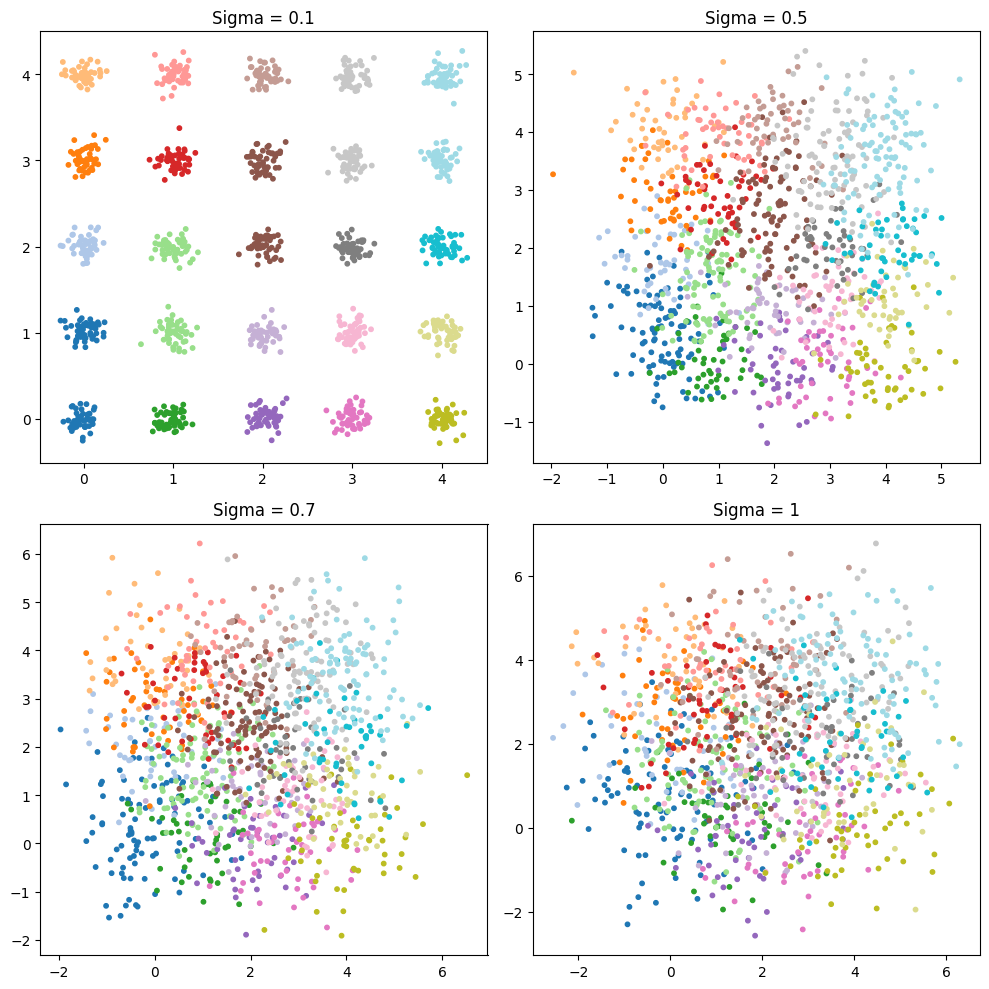

In [272]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(taille, N, sigma):
    centre = []
    for i in range(taille):
        for j in range(taille):
            centre.append((i, j))  
    data = []
    labels = []
    for idx, center in enumerate(centre):
        points = np.random.normal(loc=center, scale=sigma, size=(N, 2))
        data.append(points)
        labels += [idx] * N  

    data = np.vstack(data)
    labels = np.array(labels)
    
    return data, labels

#taille de la grille 5x5 pour 25 clusters
# chaque cluster contient 50 points
taille = 5
N = 50
sigmas = [0.1, 0.5, 0.7, 1]
dataset = {}

#pour chaque sigma
for sigma in sigmas:
    X, y = generate_data(taille, N, sigma)
    dataset[sigma] = (X, y)


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, sigma in enumerate(sigmas):
    X, y = dataset[sigma]
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20', s=10)
    ax.set_title(f"Sigma = {sigma}")
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()


Afin de comparer les méthodes j'ai utilisé indice de silhouette qui mesure à quel point chaque point est proche de son cluster(-1 mauvais regroupement et 1 bon regroupement)

silhouette_score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

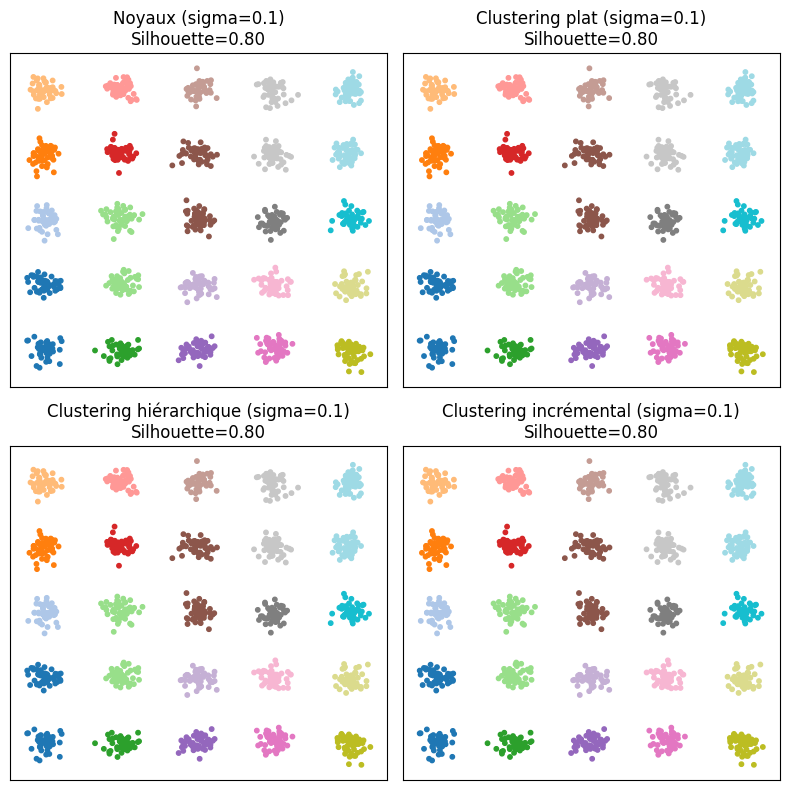

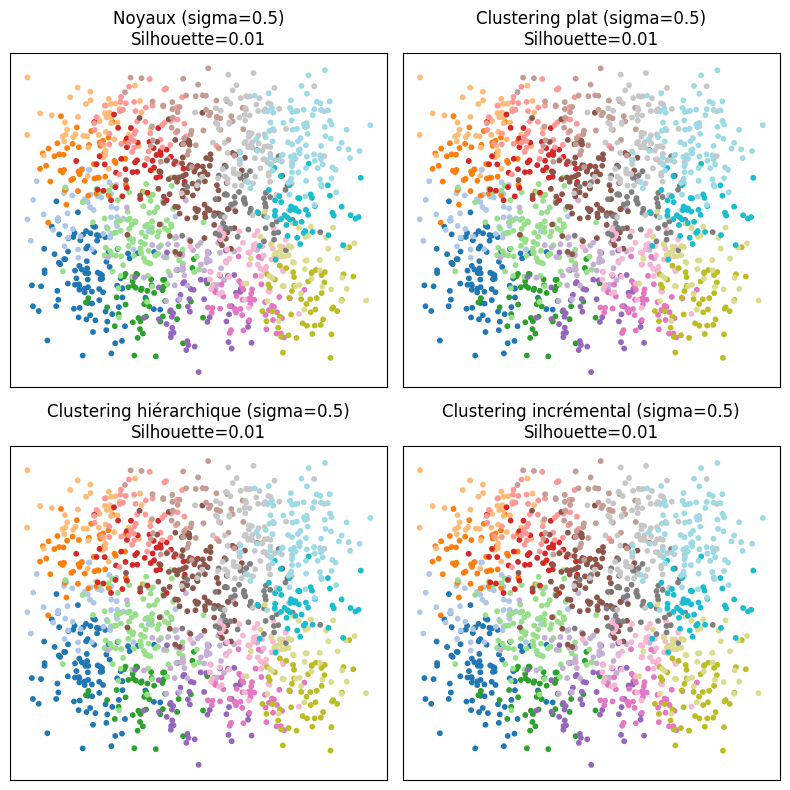

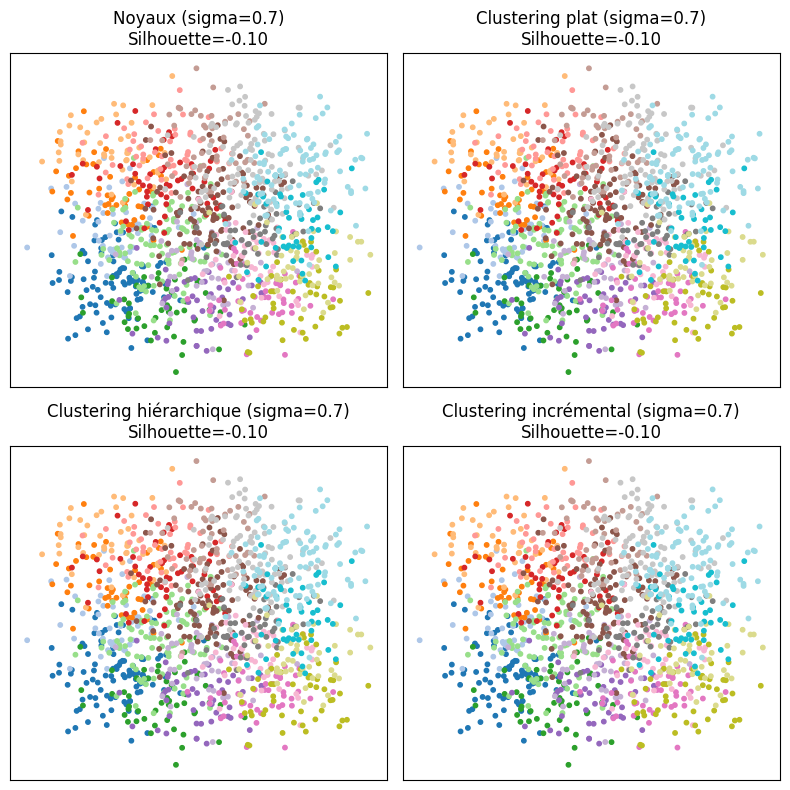

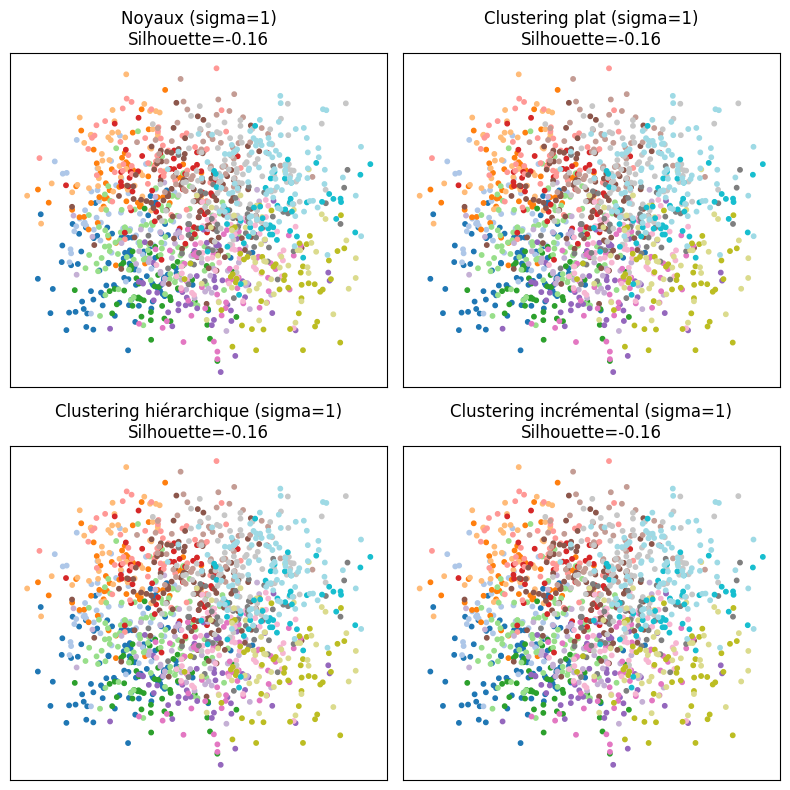

In [269]:
from sklearn.metrics import silhouette_score

taille = 5
N = 50
sigmas = [0.1, 0.5, 0.7, 1]
k_max = 10
num_cluster = 5
num_iteration = 20

X, labels = generate_data(taille, N, sigma)

#j'ai appliquer les méthodes pour différentes valeurs de sigmas
for sigma, (X, y) in dataset.items():
    gamma = 1 / (2 * sigma**2)
    
    #appliquer le methode noyau
    distance_noyaux = methode_noyau(X, gamma)
    silhouette_noyaux = silhouette_score(X, y)
    
    #appliquer le Clustering plat
    distance_clustering_flat = flat_clustering(X, num_cluster, num_iteration)
    silhouette_flat = silhouette_score(X, y)
    
    #clustering hiérarchique
    distance_clustering_hierarchical = hierarchical_clustering(X)
    silhouette_hierarchical = silhouette_score(X, y)
    
    #clustering incrémental
    distance_clustering_incremental = incremental_clustering(X, k_max)
    silhouette_incremental = silhouette_score(X, y)
  
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    axes = axes.flatten()

    axes[0].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    axes[0].set_title(f'Noyaux (sigma={sigma})\nSilhouette={silhouette_noyaux:.2f}')
  
    axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    axes[1].set_title(f'Clustering plat (sigma={sigma})\nSilhouette={silhouette_flat:.2f}')
    
    axes[2].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    axes[2].set_title(f'Clustering hiérarchique (sigma={sigma})\nSilhouette={silhouette_hierarchical:.2f}')

    axes[3].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
    axes[3].set_title(f'Clustering incrémental (sigma={sigma})\nSilhouette={silhouette_incremental:.2f}')

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()



#### comparaison des méthodes:

* Les résultats montre que la méthode basée sur les noyaux est plus performante pour des clusters bien séparés($\sigma =0.1$).

* Le clustering plat, efficace pour des petites valeurs de sigmas et il est sensible au choix de k.

* Le clustering incrémental est efficaces pour des structures complexes.


**Kernel-based :** Utilise le noyau RBF pour calculer les poids. Utilisé pour des clusters bien séparé
**Flat clustering :** calcule les poids selon la fréquence. Il dépend du choix du nombre de clusters k et fonctionne mal si les clusters sont variées. 

**Hierarchical clustering :** calcul les poids en fonction de la profendeur à laquelle deux points se séparent dans une hiérarchie.

**Incremental clustering :**  Il est efficace pour des clusters de tailles variées. 
